In [1]:
import numpy as np
import matplotlib.pyplot as plt
import datetime
import os
import tensorflow as tf

import src.consts as c
from src.model.train_model import train_model
from src.helpers.dataset_helpers import get_train_valid_test, image_generator, create_tf_dataset, get_imgs_from_model_and_dataset
from skimage import color, io

%config Application.log_level="INFO"

In [2]:
tf.__version__

'2.1.0-dev20191024'

In [3]:
import tensorflow as tf
if tf.test.gpu_device_name():
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))
else:
    print("Please install GPU version of TF")

Please install GPU version of TF


# Training

In [4]:
train_paths, valid_paths, test_paths = get_train_valid_test(c.DATASET_PATH)

MODEL_PATH = f'models'
MODEL_NAME = f'{len(train_paths)}_images_trimmed_koalarization'
SAVE_MODEL_PATH = f'{datetime.datetime.now().strftime("%Y%m%d-%H%M%S")}_{MODEL_NAME}'
SAVE_PATH = f"{MODEL_PATH}/{SAVE_MODEL_PATH}"

In [5]:
model = train_model(train_paths, valid_paths, SAVE_PATH)

Train for 1 steps, validate for 1 steps
1/1 [==============================] - 2s 2s/step - loss: 0.0020 - accuracy: 0.7419 - val_loss: 1.1451 - val_accuracy: 0.3416


In [6]:
test_data = create_tf_dataset(test_paths)

In [7]:
# Save the model
if not os.path.exists(f'{MODEL_PATH}/{SAVE_MODEL_PATH}'):
    os.makedirs(f'{MODEL_PATH}/{SAVE_MODEL_PATH}')

In [8]:
model.save(f'{MODEL_PATH}/{SAVE_MODEL_PATH}/model.h5')

In [9]:
# Recreate the exact same model purely from the file
# model = tf.keras.models.load_model(f'{MODEL_PATH}/{MODEL_NAME}/model.h5')

In [10]:
model.evaluate(test_data, steps=5)

5/5 [==============================] - 1s 115ms/step - loss: 0.9558 - accuracy: 0.3511


[0.9557902574539184, 0.35108033]

# Evaluation

In [11]:
def show_images(bw_img, original_img, predict_img):
    plt.figure(figsize=(10, 30))

    plt.subplot(1,3,1)
    plt.imshow(bw_img, cmap=plt.cm.gray)
    
    plt.subplot(1,3,2)
    plt.imshow(original_img, cmap=plt.cm.binary)

    plt.subplot(1,3,3)
    plt.imshow(predict_img, cmap=plt.cm.binary)
    
    plt.show()

## Images from Train set

In [12]:
img_path = f'{MODEL_PATH}/{SAVE_MODEL_PATH}/img'
if not os.path.exists(img_path):
    os.makedirs(img_path)

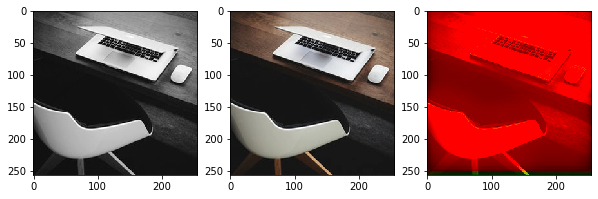

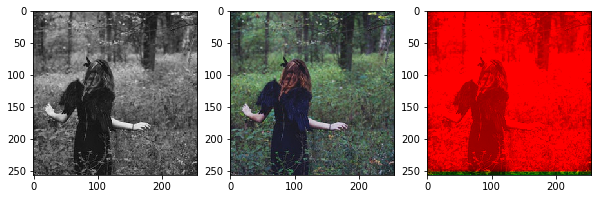

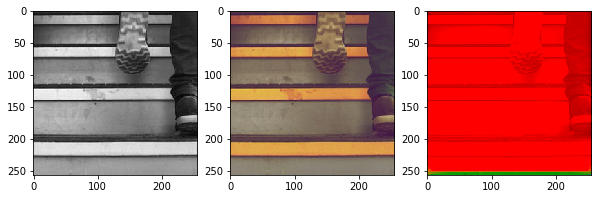

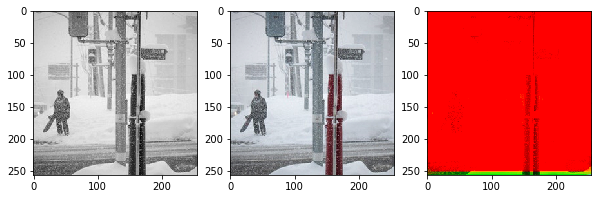

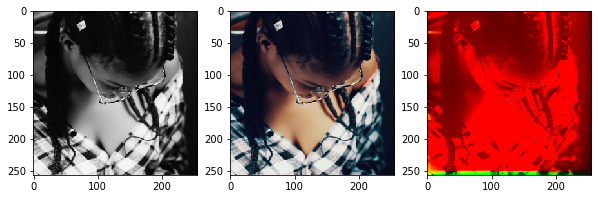

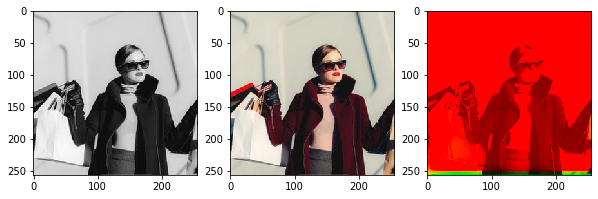

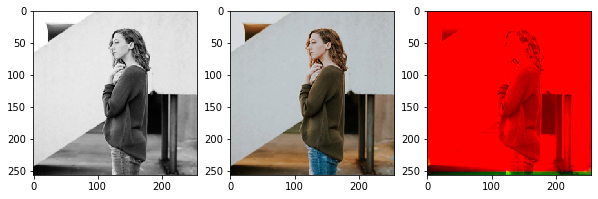

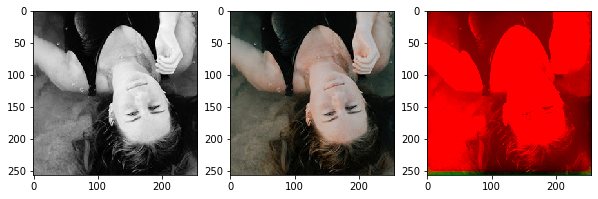

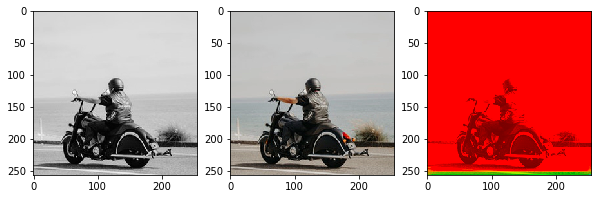

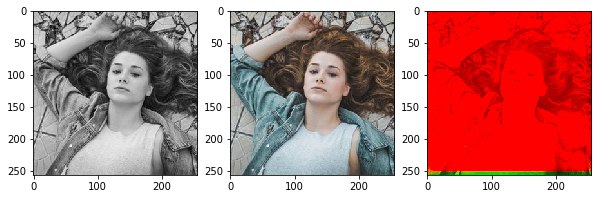

In [13]:
train_gen = image_generator(train_paths)
for i in range(10):
    inputs, ab = next(train_gen)
    bw_img, original_img, predict_img = get_imgs_from_model_and_dataset(model, inputs, ab)
    io.imsave(f'{img_path}/train_{i}_bw.jpg', bw_img)
    io.imsave(f'{img_path}/train_{i}_original.jpg', original_img)
    io.imsave(f'{img_path}/train_{i}_predict.jpg', predict_img)
    
    show_images(bw_img, original_img, predict_img)

## Images from Test set

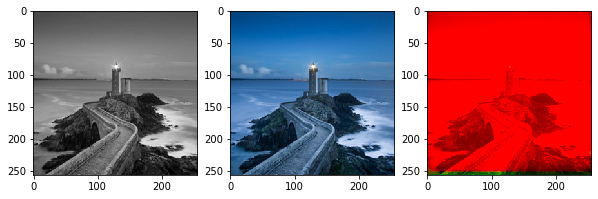

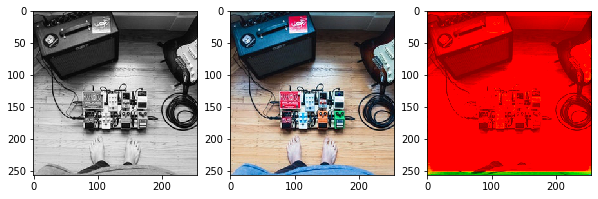

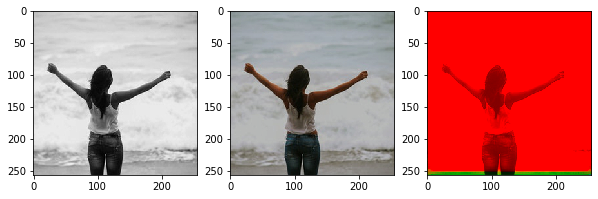

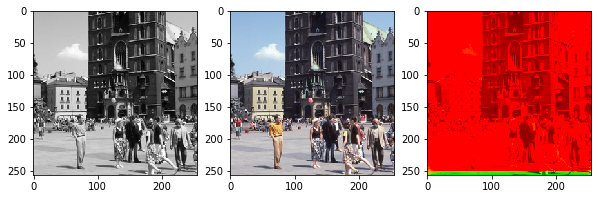

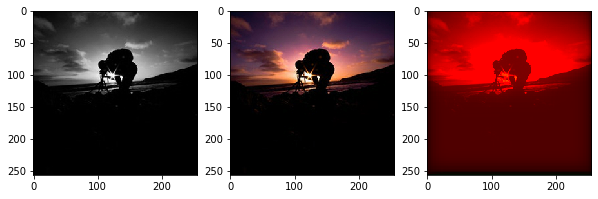

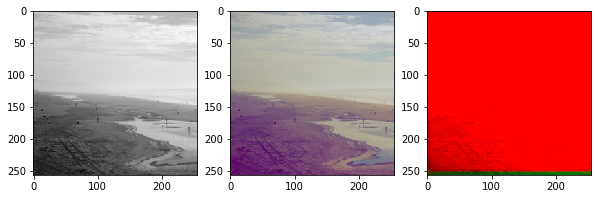

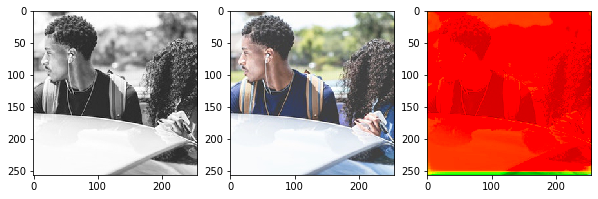

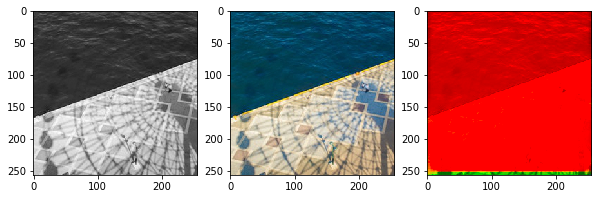

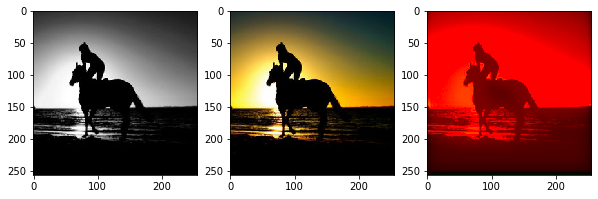

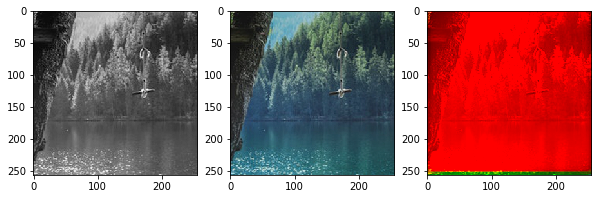

In [14]:
test_gen = image_generator(test_paths)
for i in range(10):
    inputs, ab = next(test_gen)
    bw_img, original_img, predict_img = get_imgs_from_model_and_dataset(model, inputs, ab)
    io.imsave(f'{img_path}/test_{i}_bw.jpg', bw_img)
    io.imsave(f'{img_path}/test_{i}_original.jpg', original_img)
    io.imsave(f'{img_path}/test_{i}_predict.jpg', predict_img)
    
    show_images(bw_img, original_img, predict_img)